<a href="https://colab.research.google.com/github/patrickortiz/ENDG511-Final-Project/blob/main/modelV3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENDG 511 Final Project Code**
By: Teresa Akl and Patrick Ortiz

## 1. <u>Initiallization</u>

### 1.1 Import Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import time

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


### 1.2 Import Traffic Incidents csv

In [ ]:
# Load Traffic Incidents CSV file
traffic_df = pd.read_csv("/content/drive/MyDrive/ENDG_511/Final_Project/Traffic_Incidents_20250303.csv")
traffic_df.head()

,INCIDENT INFO,DESCRIPTION,START_DT,MODIFIED_DT,QUADRANT,Longitude,Latitude,Count,id,Point
0,Westbound 16 Avenue at Deerfoot Trail NE,Stalled vehicle. Partially blocking the right...,2022/06/21 07:31:40 AM,2022/06/21 07:33:16 AM,NE,-114.026687,51.067485,1,2022-06-21T07:31:4051.067485129276236-114.0266...,POINT (-114.02668672232672 51.067485129276236)
1,11 Avenue and 4 Street SW,Traffic incident. Blocking multiple lanes,2022/06/21 04:02:11 AM,2022/06/21 04:12:38 AM,SW,-114.071481,51.042624,1,2022-06-21T04:02:1151.04262449261462-114.07148...,POINT (-114.07148057660925 51.04262449261462)
2,68 Street and Memorial Drive E,Traffic incident.,2022/06/20 11:53:08 PM,2022/06/20 11:55:42 PM,NE,-113.935553,51.052474,1,2022-06-20T23:53:0851.0524735056658-113.935553...,POINT (-113.935553325751 51.0524735056658)
3,Eastbound 16 Avenue and 36 Street NE,Traffic incident. Blocking the left shoulder,2022/06/20 04:43:21 PM,2022/06/20 05:17:05 PM,NE,-113.989219,51.067086,1,2022-06-20T16:43:2151.06708565896752-113.98921...,POINT (-113.98921905311566 51.06708565896752)
4,Barlow Trail and 61 Avenue SE,Traffic incident.,2022/06/20 04:42:12 PM,2022/06/20 05:28:21 PM,SE,-113.985727,50.998727,1,2022-06-20T16:42:1250.99872748477766-113.98572...,POINT (-113.98572655353505 50.99872748477766)


### 1.3 Import Weather Data csv

In [ ]:
# Load Calgary Weather CSV file
weather_df = pd.read_csv("/content/drive/MyDrive/ENDG_511/Final_Project/Calgary_Weather_Data.csv")
weather_df.head()

,Date/Time,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Spd of Max Gust (km/h)
0,2016-01-01,1.2,-12.0,-5.4,0.0,0.0,0.0,11.0,<31
1,2016-01-02,-1.6,-16.8,-9.2,0.0,0.0,0.0,11.0,<31
2,2016-01-03,-2.7,-16.3,-9.5,0.0,0.0,0.0,11.0,<31
3,2016-01-04,-2.0,-12.9,-7.5,0.0,0.0,0.0,10.0,<31
4,2016-01-05,-7.1,-13.8,-10.5,0.0,0.0,0.0,10.0,<31


## 2. <u>Data Manipulation: Clean and Append both datasets</u>

### 2.1 Create a column that only contains specific day

In [ ]:
traffic_df['START_DT'] = pd.to_datetime(traffic_df['START_DT'], errors='coerce')

# Extract the date from 'START_DT' (ignoring the time part)
traffic_df['DATE'] = traffic_df['START_DT'].dt.date

traffic_df['DATE']


,DATE
0,2022-06-21
1,2022-06-21
2,2022-06-20
3,2022-06-20
4,2022-06-20
...,...
53300,2025-03-03
53301,2025-03-03
53302,2025-03-03
53303,2025-03-03


In [ ]:
weather_df['Date/Time'] = pd.to_datetime(weather_df['Date/Time'], errors='coerce')

# Extract just the date from the 'Date/Time' column (without the time part)
weather_df['DATE'] = weather_df['Date/Time'].dt.date
weather_df['DATE']

,DATE
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05
...,...
8259,2025-03-04
8260,2025-03-10
8261,2025-03-11
8262,2025-03-13


### 2.2 Drop additional dates that are not in Traffic Incidents Dataframe

In [ ]:
# Drop the rows from weather_df where the 'DATE' is not in traffic_df
weather_df = weather_df[weather_df['DATE'].isin(traffic_df['DATE'])]

# Verify the number of remaining rows after the drop
print(f"Remaining rows in weather_df: {weather_df.shape[0]}")

# Optionally, show the first few rows of the cleaned weather_df
weather_df.head()

Remaining rows in weather_df: 7144


,Date/Time,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Spd of Max Gust (km/h),DATE
83,2016-12-06,-18.2,-21.4,-19.8,0.0,0.0,0.0,3.0,48,2016-12-06
84,2016-12-07,-18.6,-25.0,-21.8,0.0,0.0,0.0,3.0,33,2016-12-07
85,2016-12-08,-19.8,-26.7,-23.3,0.0,0.0,0.0,3.0,<31,2016-12-08
86,2016-12-09,-20.2,-24.4,-22.3,0.0,0.4,0.4,3.0,30,2016-12-09
87,2016-12-11,-15.6,-23.7,-19.7,0.0,0.2,0.2,3.0,33,2016-12-11


### 2.3 Merge Traffic Dataframe with the Date of Weather Dataframe

In [ ]:
#This line of code creates a new dataframe
#The new dataframe contains only the traffic dataframe information that has the same dates found in weather data

traffic_weather_df = traffic_df[traffic_df['DATE'].isin(weather_df['DATE'])]  #New Dataframe: Appends rows where traffic incidents are in weathered data

print(traffic_weather_df.shape[0])
traffic_weather_df.head()


17286


,INCIDENT INFO,DESCRIPTION,START_DT,MODIFIED_DT,QUADRANT,Longitude,Latitude,Count,id,Point,DATE
12,14 Street and 20 Avenue NW,Traffic incident.,2023-04-06 06:59:22,2023/04/06 07:30:59 AM,NW,-114.094735,51.070529,1,2023-04-06T06:59:2251.070529029788005-114.0947...,POINT (-114.09473549720462 51.070529029788005),2023-04-06
17,Southbound Macleod Trail and 42 Avenue SW,Two vehicle incident. Blocking multiple lanes,2023-04-06 05:44:31,2023/04/06 05:47:25 AM,SW,-114.064601,51.015755,1,2023-04-06T05:44:3151.015755143354234-114.0646...,POINT (-114.06460127546032 51.015755143354234),2023-04-06
20,Southbound Stoney Trail approaching Glenmore ...,Traffic incident. Blocking the right lane,2023-01-27 15:29:57,2023/01/27 03:48:34 PM,SE,-113.921852,50.990819,1,2023-01-27T15:29:5750.990819055797836-113.9218...,POINT (-113.92185230808678 50.990819055797836),2023-01-27
23,Southbound 14 Street and 9 Avenue SW,Two vehicle incident. Blocking multiple lanes,2023-04-06 07:53:11,2023/04/06 07:57:48 AM,SW,-114.095052,51.045615,1,2023-04-06T07:53:1151.04561512596794-114.09505...,POINT (-114.09505231654495 51.04561512596794),2023-04-06
31,8 Avenue and 14 Street NW,Traffic incident.,2023-03-02 11:44:50,2023/03/02 12:13:22 PM,NW,-114.094725,51.059571,1,2023-03-02T11:44:5051.05957112794977-114.09472...,POINT (-114.09472540116599 51.05957112794977),2023-03-02


### 2.4 Merge Traffic Dataframe with Climate Dataframe

In [ ]:
#This Dataframe merges the both datsets. without conflicting with the date
merged_df = pd.merge(traffic_weather_df, weather_df, on='DATE', how='left')
merged_df = merged_df.drop_duplicates()

# Display the merged data
print(merged_df.shape[0])
merged_df.head()

17286


,INCIDENT INFO,DESCRIPTION,START_DT,MODIFIED_DT,QUADRANT,Longitude,Latitude,Count,id,Point,DATE,Date/Time,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Spd of Max Gust (km/h)
0,14 Street and 20 Avenue NW,Traffic incident.,2023-04-06 06:59:22,2023/04/06 07:30:59 AM,NW,-114.094735,51.070529,1,2023-04-06T06:59:2251.070529029788005-114.0947...,POINT (-114.09473549720462 51.070529029788005),2023-04-06,2023-04-06,8.4,-5.7,1.4,0.0,0.0,0.0,0.0,42.0
8,Southbound Macleod Trail and 42 Avenue SW,Two vehicle incident. Blocking multiple lanes,2023-04-06 05:44:31,2023/04/06 05:47:25 AM,SW,-114.064601,51.015755,1,2023-04-06T05:44:3151.015755143354234-114.0646...,POINT (-114.06460127546032 51.015755143354234),2023-04-06,2023-04-06,8.4,-5.7,1.4,0.0,0.0,0.0,0.0,42.0
16,Southbound Stoney Trail approaching Glenmore ...,Traffic incident. Blocking the right lane,2023-01-27 15:29:57,2023/01/27 03:48:34 PM,SE,-113.921852,50.990819,1,2023-01-27T15:29:5750.990819055797836-113.9218...,POINT (-113.92185230808678 50.990819055797836),2023-01-27,2023-01-27,1.3,-13.2,-6.0,0.0,16.0,13.8,5.0,47.0
24,Southbound 14 Street and 9 Avenue SW,Two vehicle incident. Blocking multiple lanes,2023-04-06 07:53:11,2023/04/06 07:57:48 AM,SW,-114.095052,51.045615,1,2023-04-06T07:53:1151.04561512596794-114.09505...,POINT (-114.09505231654495 51.04561512596794),2023-04-06,2023-04-06,8.4,-5.7,1.4,0.0,0.0,0.0,0.0,42.0
32,8 Avenue and 14 Street NW,Traffic incident.,2023-03-02 11:44:50,2023/03/02 12:13:22 PM,NW,-114.094725,51.059571,1,2023-03-02T11:44:5051.05957112794977-114.09472...,POINT (-114.09472540116599 51.05957112794977),2023-03-02,2023-03-02,5.2,-5.3,-0.1,0.0,0.0,0.0,13.0,79.0


### 2.5 Modify columns in merged dataframe

In [ ]:
merged_df = merged_df.drop(columns=['Spd of Max Gust (km/h)'])
merged_df['hour_of_day'] = merged_df['DATE'].apply(lambda x: pd.to_datetime(x).hour)  # assuming 'DATE' is a string with time
merged_df['day_of_week'] = pd.to_datetime(merged_df['DATE']).dt.dayofweek  # 0 = Monday, 6 = Sunday
merged_df['day_of_month'] = pd.to_datetime(merged_df['DATE']).dt.day
merged_df = merged_df.reset_index(drop=True)

# Display merged data
print(merged_df.columns)
merged_df.head()

Index(['INCIDENT INFO', 'DESCRIPTION', 'START_DT', 'MODIFIED_DT', 'QUADRANT',
       'Longitude', 'Latitude', 'Count', 'id', 'Point', 'DATE', 'Date/Time',
       'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)',
       'hour_of_day', 'day_of_week', 'day_of_month'],
      dtype='object')


,INCIDENT INFO,DESCRIPTION,START_DT,MODIFIED_DT,QUADRANT,Longitude,Latitude,Count,id,Point,...,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),hour_of_day,day_of_week,day_of_month
0,14 Street and 20 Avenue NW,Traffic incident.,2023-04-06 06:59:22,2023/04/06 07:30:59 AM,NW,-114.094735,51.070529,1,2023-04-06T06:59:2251.070529029788005-114.0947...,POINT (-114.09473549720462 51.070529029788005),...,8.4,-5.7,1.4,0.0,0.0,0.0,0.0,0,3,6
1,Southbound Macleod Trail and 42 Avenue SW,Two vehicle incident. Blocking multiple lanes,2023-04-06 05:44:31,2023/04/06 05:47:25 AM,SW,-114.064601,51.015755,1,2023-04-06T05:44:3151.015755143354234-114.0646...,POINT (-114.06460127546032 51.015755143354234),...,8.4,-5.7,1.4,0.0,0.0,0.0,0.0,0,3,6
2,Southbound Stoney Trail approaching Glenmore ...,Traffic incident. Blocking the right lane,2023-01-27 15:29:57,2023/01/27 03:48:34 PM,SE,-113.921852,50.990819,1,2023-01-27T15:29:5750.990819055797836-113.9218...,POINT (-113.92185230808678 50.990819055797836),...,1.3,-13.2,-6.0,0.0,16.0,13.8,5.0,0,4,27
3,Southbound 14 Street and 9 Avenue SW,Two vehicle incident. Blocking multiple lanes,2023-04-06 07:53:11,2023/04/06 07:57:48 AM,SW,-114.095052,51.045615,1,2023-04-06T07:53:1151.04561512596794-114.09505...,POINT (-114.09505231654495 51.04561512596794),...,8.4,-5.7,1.4,0.0,0.0,0.0,0.0,0,3,6
4,8 Avenue and 14 Street NW,Traffic incident.,2023-03-02 11:44:50,2023/03/02 12:13:22 PM,NW,-114.094725,51.059571,1,2023-03-02T11:44:5051.05957112794977-114.09472...,POINT (-114.09472540116599 51.05957112794977),...,5.2,-5.3,-0.1,0.0,0.0,0.0,13.0,0,3,2


### 2.6 Create target variable

In [ ]:
super_df = merged_df.groupby('DATE').size().reset_index(name='Num_Crashes')
print(super_df.columns)
print(super_df.shape[0])
super_df.head()

Index(['DATE', 'Num_Crashes'], dtype='object')
893


,DATE,Num_Crashes
0,2016-12-06,11
1,2016-12-07,24
2,2016-12-08,27
3,2016-12-09,41
4,2016-12-11,9


In [ ]:
# Create a new DataFrame where each date repeats according to the number of crashes for that day
daily_crashes = super_df.loc[
    super_df.index.repeat(super_df['Num_Crashes'])
].reset_index(drop=True)

# Add a new column where the value for each row is always 1
daily_crashes['Num_Crashes'] = 1

# Show the results
print(daily_crashes.columns)
print(daily_crashes.shape[0])
daily_crashes.head()

Index(['DATE', 'Num_Crashes'], dtype='object')
17286


,DATE,Num_Crashes
0,2016-12-06,1
1,2016-12-06,1
2,2016-12-06,1
3,2016-12-06,1
4,2016-12-06,1


## 3. <u>Fine-Tuning Parameters (**MODIFIABLE**)</u>

### 3.1 First Model

In [ ]:
# # Configurable parameters
# train_test_split_ratio = 0.2  #Test size: 20%, Training size: 80%
# batch_size = 32
# lr = 1e-4
# weight_decay = 1e-4
# epochs = 30

### 3.2 Second Model

In [ ]:
# # Configurable parameters
# train_test_split_ratio = 0.2  #Test size: 20%, Training size: 80%
# batch_size = 64
# lr = 5e-5
# epochs = 60

### 3.3 Third Model

In [ ]:
# Configurable parameters
train_test_split_ratio = 0.2  #Test size: 20%, Training size: 80%
batch_size = 32
lr = 5e-3
epochs = 75

### 3.4 Fourth Model

In [ ]:
# Configurable parameters
train_test_split_ratio = 0.2  #Test size: 20%, Training size: 80%
batch_size = 32
lr = 7e-2
epochs = 75

### 3.5 First ModelV2

In [ ]:
# Configurable parameters
train_test_split_ratio = 0.2  #Test size: 20%, Training size: 80%
batch_size = 32
lr = 5e-3
epochs = 75

### 3.6 Second ModelV2

In [ ]:
# Configurable parameters
train_test_split_ratio = 0.2  #Test size: 20%, Training size: 80%
batch_size = 64
lr = 5e-2
epochs = 75

### 3.7 Third ModelV2

In [ ]:
# Configurable parameters
train_test_split_ratio = 0.6  #Test size: 60%, Training size: 40%
batch_size = 32
lr = 8e-3
epochs = 80

### 3.8 Fourth ModelV2

In [ ]:
# Configurable parameters
train_test_split_ratio = 0.2  #Test size: 60%, Training size: 40%
batch_size = 32
lr = 0.9
epochs = 80

### 3.9 Fifth ModelV2

In [ ]:
# Configurable parameters
train_test_split_ratio = 0.2  #Test size: 60%, Training size: 40%
batch_size = 32
lr = 0.01
epochs = 40   #Optimal Epoch is 40

## 4. <u>Feature Selection and scaling **(MODIFIABLE)**</u>

### 4.1 Mean Temperature (°C), hour, day, month, rain, snow, quadrant

In [ ]:
# Define categorical features
categorical_features = ['hour_of_day', 'day_of_week', 'QUADRANT']

# Apply OneHotEncoding to categorical features and StandardScaler to numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), ['Mean Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'day_of_month'])  # Scale numeric columns
    ])

# Apply transformations to the features
features = ['Mean Temp (°C)', 'hour_of_day', 'day_of_week', 'day_of_month', 'Total Rain (mm)', 'Total Snow (cm)', 'QUADRANT']
X = preprocessor.fit_transform(merged_df[features])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, daily_crashes['Num_Crashes'].values, test_size=train_test_split_ratio, random_state=42)

## 5. <u>Creating and Training the model</u>

In [ ]:
# Build TensorFlow Model
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Regression output layer
])

In [ ]:
# Compile the model with a custom learning rate and weight decay
optimizer = optimizers.Adam(learning_rate=lr)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=train_test_split_ratio)

Epoch 1/40
346/346 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0394 - mae: 0.0925 - val_loss: 2.9113e-04 - val_mae: 0.0107
Epoch 2/40
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.6053e-04 - mae: 0.0104 - val_loss: 1.2375e-04 - val_mae: 0.0080
Epoch 3/40
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3368e-04 - mae: 0.0067 - val_loss: 1.0107e-04 - val_mae: 0.0070
Epoch 4/40
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1157e-04 - mae: 0.0072 - val_loss: 4.7568e-05 - val_mae: 0.0051
Epoch 5/40
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6566e-04 - mae: 0.0075 - val_loss: 4.6207e-05 - val_mae: 0.0050
Epoch 6/40
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.5032e-05 - mae: 0.0046 - val_loss: 5.6091e-05 - val_mae: 0.0068
Epoch 7/40
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.7254e-05 - mae: 0.0037 - val_loss: 3.1419e-05 - val_mae: 0.0044
Epoch 8/40
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.1734e-05 - mae: 0.0046 - val_loss: 3.2067e-05 - val_mae: 0.0

## 6. <u>Save the created model</u>

In [ ]:
model.save("/content/drive/MyDrive/ENDG_511/Final_Project/sixth_modelV2.h5")

## 7. <u>Evaluate the model</u>

433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Training Error: 0.000127418325028
Mean Test Error: 0.000129339907333


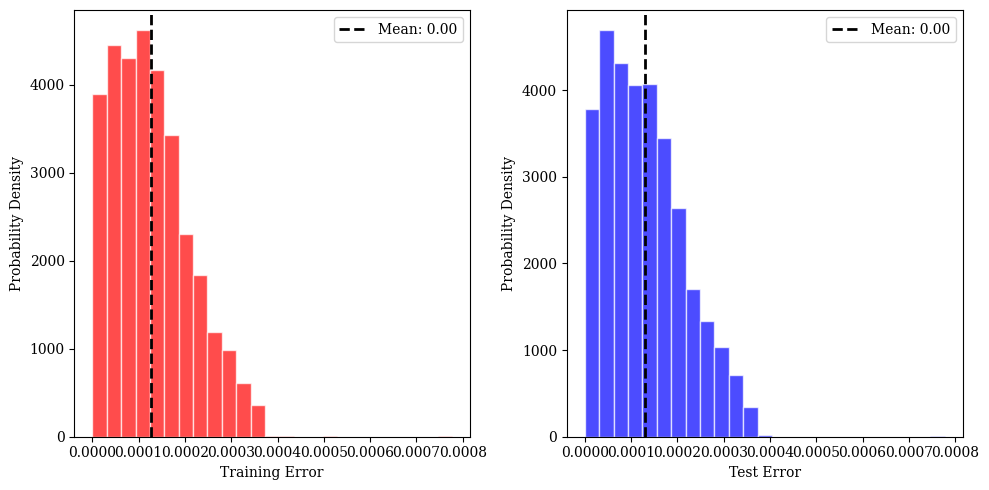

In [ ]:
# Predict values for both training and testing datasets
y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()

# Calculate errors (absolute difference)
train_errors = np.abs(y_train - y_train_pred)
test_errors = np.abs(y_test - y_test_pred)

# Plot error histograms
plt.rcParams["font.family"] = "serif"

mean_train_error = np.mean(train_errors)
mean_test_error = np.mean(test_errors)

print(f'Mean Training Error: {mean_train_error:.15f}')
print(f'Mean Test Error: {mean_test_error:.15f}')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
bins = 25

# Training Error Histogram
axs[0].hist(train_errors, bins=bins, color="red", edgecolor="w", alpha=0.7, density=True)
axs[0].axvline(mean_train_error, color="black", linestyle="--", linewidth=2, label=f"Mean: {mean_train_error:.2f}")
axs[0].set_xlabel("Training Error")
axs[0].set_ylabel("Probability Density")
axs[0].legend()

# Test Error Histogram
axs[1].hist(test_errors, bins=bins, color="blue", edgecolor="w", alpha=0.7, density=True)
axs[1].axvline(mean_test_error, color="black", linestyle="--", linewidth=2, label=f"Mean: {mean_test_error:.2f}")
axs[1].set_xlabel("Test Error")
axs[1].set_ylabel("Probability Density")
axs[1].legend()

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/ENDG_511/Final_Project/sixth_error_histogramV2.png", dpi=300)  #Save image
plt.show()

## 8. <u>Pruning</u>

### 8.1 Weight Pruning Function

In [ ]:
def prune_weights(model, threshold):
  '''
  Manual pruning model that sets values smaller than the
  threshold to zero. A replacement for tfmot

  Arguments: model, threshold
  Returns: none

  '''
  for layer in model.layers:
        if isinstance(layer, layers.Dense):  # Check if it's a Dense layer
            # Get the current weights
            weights, biases = layer.get_weights()
            # Prune weights smaller than the threshold by setting them to zero
            weights[np.abs(weights) < threshold] = 0
            # Set the new weights
            layer.set_weights([weights, biases])

### 8.2 Threshold Parameter **(MODIFIABLE)**

In [ ]:
# Apply pruning to the modelV1 (1: 0.3, 2: 0.1, 3: 0.005, 4: 0.08 )
# modelV2 (1: 0.3, 2: 0.5, 3: 0.1, 4: 0.6, 5: 0.8, 6: 0.1)
threshold = 0.1
prune_weights(model, threshold)

### 8.3 Save Pruned Model

In [ ]:
model.save("/content/drive/MyDrive/ENDG_511/Final_Project/sixth_pruned_modelV2.h5")

### 8.4 Evaluate Pruned Model

433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Training Error (Pruned Model): 0.032494978323506
Mean Test Error (Pruned Model): 0.032448722938363


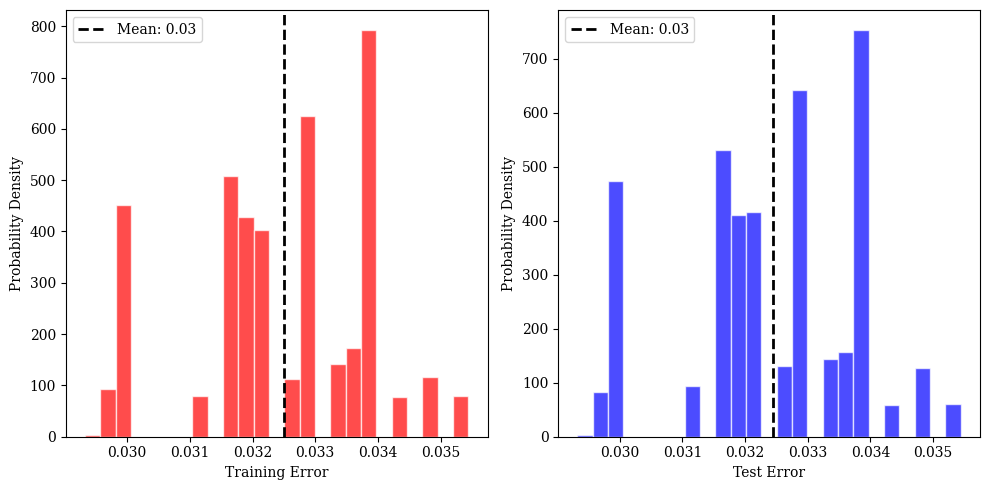

In [ ]:
# Predict values for both training and testing datasets using the pruned model
y_train_pred_pruned = model.predict(X_train).flatten()
y_test_pred_pruned = model.predict(X_test).flatten()

# Calculate errors (absolute difference) for pruned model
train_errors_pruned = np.abs(y_train - y_train_pred_pruned)
test_errors_pruned = np.abs(y_test - y_test_pred_pruned)

# Plot error histograms for pruned model
plt.rcParams["font.family"] = "serif"

mean_train_error_pruned = np.mean(train_errors_pruned)
mean_test_error_pruned = np.mean(test_errors_pruned)

print(f'Mean Training Error (Pruned Model): {mean_train_error_pruned:.15f}')
print(f'Mean Test Error (Pruned Model): {mean_test_error_pruned:.15f}')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
bins = 25

# Training Error Histogram (Pruned Model)
axs[0].hist(train_errors_pruned, bins=bins, color="red", edgecolor="w", alpha=0.7, density=True)
axs[0].axvline(mean_train_error_pruned, color="black", linestyle="--", linewidth=2, label=f"Mean: {mean_train_error_pruned:.2f}")
axs[0].set_xlabel("Training Error")
axs[0].set_ylabel("Probability Density")
axs[0].legend()

# Test Error Histogram (Pruned Model)
axs[1].hist(test_errors_pruned, bins=bins, color="blue", edgecolor="w", alpha=0.7, density=True)
axs[1].axvline(mean_test_error_pruned, color="black", linestyle="--", linewidth=2, label=f"Mean: {mean_test_error_pruned:.2f}")
axs[1].set_xlabel("Test Error")
axs[1].set_ylabel("Probability Density")
axs[1].legend()

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/ENDG_511/Final_Project/sixth_error_histogram_prunedV2.png", dpi=300) #Save image
plt.show()

## 9. <u>Quantization</u>

### 9.1 Convert Model to TensorFlow Lite (8-bit)

In [ ]:
# Passing the Keras model to the TFLite Converter.
converter = tf.lite.TFLiteConverter.from_keras_model(model) #Convert model into 8-bit
# Setting the default optimizer
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Convert the model
quantized_tflite_model = converter.convert()

Saved artifact at '/tmp/tmp6ru2ojn4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 17), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  133393783268240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133393783266896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133393783268816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133393783269776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133393783267664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133393783270544: TensorSpec(shape=(), dtype=tf.resource, name=None)


### 9.2 Save Quantized Model

In [ ]:
with open('/content/drive/MyDrive/ENDG_511/Final_Project/sixth_quantized_modelV2.tflite', 'wb') as f:
    f.write(quantized_tflite_model)

### 9.3 Load the Model into Interpreter

In [ ]:
interpreter_quant = tf.lite.Interpreter(model_path='/content/drive/MyDrive/ENDG_511/Final_Project/sixth_quantized_modelV2.tflite')
interpreter_quant.allocate_tensors()

### 9.4 Evaluate Quantized Model Size

In [ ]:
def evaluate_model(interpreter, X_test, y_test):
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Run predictions on the test dataset
    prediction_values = []
    for test_input in X_test:
        # Pre-processing: add batch dimension and convert to float32
        test_input = np.expand_dims(test_input, axis=0).astype(np.float32)
        interpreter.set_tensor(input_details[0]['index'], test_input)

        # Run inference
        start_time = time.time()
        interpreter.invoke()
        execution_time = (time.time() - start_time) / len(X_test)

        # Post-processing: retrieve output and append to prediction list
        output = interpreter.get_tensor(output_details[0]['index'])
        prediction_values.append(output[0][0])  # Regression output is single value

    # Calculate Mean Absolute Error (MAE) and compare with actual values
    y_pred = np.array(prediction_values)
    mae = np.mean(np.abs(y_test - y_pred))

    # Calculate model size
    model_size = len(quantized_tflite_model)  # in bytes

    # Print results
    print("\nModel MAE:", mae)
    print("Model Size: %.2f bytes" % model_size)
    print("Inference Time per sample: %.4f s" % execution_time)

    return mae, model_size, execution_time

# Evaluate the quantized model using test data (replace X_test and y_test with your actual data)
mae, model_size, exec_time = evaluate_model(interpreter_quant, X_test, y_test)


Model MAE: 0.03272096573996227
Model Size: 6752.00 bytes
Inference Time per sample: 0.0000 s


### 9.5 Evaluate Quantized Model

433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Model MAE: 0.03272096573996227
Model Size: 6752.00 bytes
Inference Time per sample: 0.0000 s
Mean Training Error (Quantized Model): 0.032494978323506
Mean Test Error (Quantized Model): 0.967279034260038


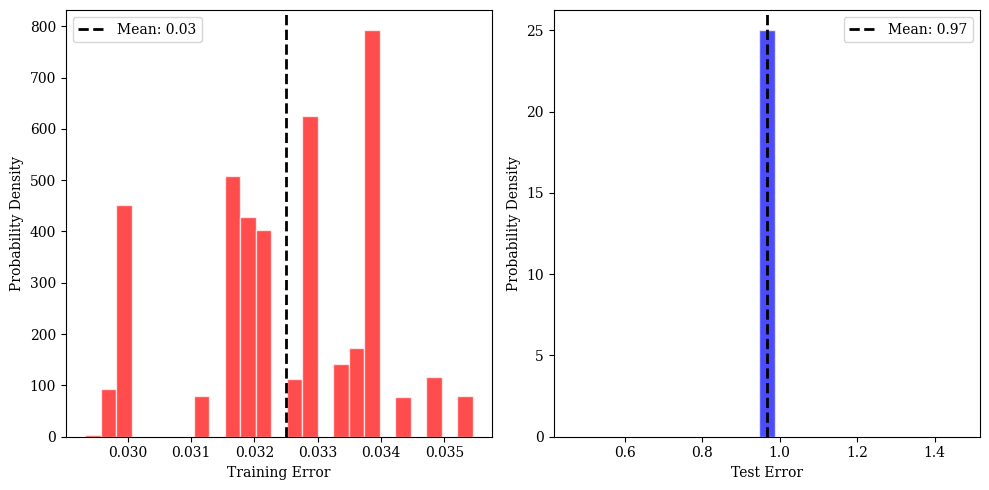

In [ ]:
# Calculate errors (absolute difference) for quantized model
train_errors_quantized = np.abs(y_train - model.predict(X_train).flatten())
y_test_pred_quantized = evaluate_model(interpreter_quant, X_test, y_test)[0]  # Get predictions for test data
test_errors_quantized = np.abs(y_test - y_test_pred_quantized)

# Plot error histograms for quantized model
plt.rcParams["font.family"] = "serif"

mean_train_error_quantized = np.mean(train_errors_quantized)
mean_test_error_quantized = np.mean(test_errors_quantized)

print(f'Mean Training Error (Quantized Model): {mean_train_error_quantized:.15f}')
print(f'Mean Test Error (Quantized Model): {mean_test_error_quantized:.15f}')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
bins = 25

# Training Error Histogram (Quantized Model)
axs[0].hist(train_errors_quantized, bins=bins, color="red", edgecolor="w", alpha=0.7, density=True)
axs[0].axvline(mean_train_error_quantized, color="black", linestyle="--", linewidth=2, label=f"Mean: {mean_train_error_quantized:.2f}")
axs[0].set_xlabel("Training Error")
axs[0].set_ylabel("Probability Density")
axs[0].legend()

# Test Error Histogram (Quantized Model)
axs[1].hist(test_errors_quantized, bins=bins, color="blue", edgecolor="w", alpha=0.7, density=True)
axs[1].axvline(mean_test_error_quantized, color="black", linestyle="--", linewidth=2, label=f"Mean: {mean_test_error_quantized:.2f}")
axs[1].set_xlabel("Test Error")
axs[1].set_ylabel("Probability Density")
axs[1].legend()

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/ENDG_511/Final_Project/sixth_error_histogram_quantizedV2.png", dpi=300)  # Save image
plt.show()

## <u>Extra</u>

### Mean Temperature (°C)

In [ ]:
features = ['Mean Temp (°C)']
X = merged_df[features].values
y = merged_df['Num_Crashes'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=train_test_split_ratio, random_state=42)

In [ ]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Mean Temperature (°C), hour, day, month, rain, snow, quadrant, Description

In [ ]:
# # Define categorical features
# categorical_features = ['hour_of_day', 'day_of_week', 'QUADRANT', 'DESCRIPTION']

# # Apply OneHotEncoding to categorical features and StandardScaler to numerical features
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(), categorical_features),
#         ('num', StandardScaler(), ['Mean Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'day_of_month'])  # Scale numeric columns
#     ])

# # Apply transformations to the features
# features = ['Mean Temp (°C)', 'hour_of_day', 'day_of_week', 'day_of_month', 'Total Rain (mm)', 'Total Snow (cm)', 'QUADRANT', 'DESCRIPTION']
# X = preprocessor.fit_transform(merged_df[features])

# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, daily_crashes['Num_Crashes'].values, test_size=train_test_split_ratio, random_state=42)

### Code String

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import time

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

from google.colab import drive

drive.mount('/content/drive')

# Load Traffic Incidents CSV file
traffic_df = pd.read_csv("/content/drive/MyDrive/ENDG_511/Final_Project/Traffic_Incidents_20250303.csv")
traffic_df.head()

# Load Calgary Weather CSV file
weather_df = pd.read_csv("/content/drive/MyDrive/ENDG_511/Final_Project/Calgary_Weather_Data.csv")
weather_df.head()

# Convert 'START_DT' and 'Date/Time' to datetime format
traffic_df['START_DT'] = pd.to_datetime(traffic_df['START_DT'], errors='coerce')
weather_df['Date/Time'] = pd.to_datetime(weather_df['Date/Time'], errors='coerce')

# Extract only the date (removes time component)
traffic_df['DATE'] = traffic_df['START_DT'].dt.date
weather_df['DATE'] = weather_df['Date/Time'].dt.date

# Drop original datetime columns if no longer needed
traffic_df.drop(['START_DT'], axis=1, inplace=True)
weather_df.drop(['Date/Time'], axis=1, inplace=True)

# Merge the datasets on the 'DATE' column
merged_df = pd.merge(traffic_df, weather_df, on='DATE', how='inner')
merged_df = merged_df.drop(columns=['Spd of Max Gust (km/h)'])

# Display merged data
print(merged_df.columns)

daily_crashes = traffic_df.groupby('DATE').size().reset_index(name='Num_Crashes')
super_df = pd.merge(daily_crashes, merged_df, on='DATE', how='inner')

# Configurable parameters
train_test_split_ratio = 0.3
batch_size = 32
lr = 3e-4
weight_decay = 0.02
epochs = 5

features = ['Mean Temp (°C)']
X = super_df[features].values
y = super_df['Num_Crashes'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=train_test_split_ratio, random_state=42)


# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build TensorFlow Model
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Regression output layer
])

# Compile the model with a custom learning rate and weight decay
optimizer = optimizers.Adam(learning_rate=lr)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

model.save("/content/drive/MyDrive/ENDG_511/Final_Project/supermodelV2")

# Predict values for both training and testing datasets
y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()

# Calculate errors (absolute difference)
train_errors = np.abs(y_train - y_train_pred)
test_errors = np.abs(y_test - y_test_pred)

# Plot error histograms
plt.rcParams["font.family"] = "serif"

mean_train_error = np.mean(train_errors)
mean_test_error = np.mean(test_errors)

print(f'Mean Training Error: {mean_train_error:.2f}')
print(f'Mean Test Error: {mean_test_error:.2f}')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
bins = 25

# Training Error Histogram
axs[0].hist(train_errors, bins=bins, color="red", edgecolor="w", alpha=0.7, density=True)
axs[0].axvline(mean_train_error, color="black", linestyle="--", linewidth=2, label=f"Mean: {mean_train_error:.2f}")
axs[0].set_xlabel("Training Error")
axs[0].set_ylabel("Probability Density")
axs[0].legend()

# Test Error Histogram
axs[1].hist(test_errors, bins=bins, color="blue", edgecolor="w", alpha=0.7, density=True)
axs[1].axvline(mean_test_error, color="black", linestyle="--", linewidth=2, label=f"Mean: {mean_test_error:.2f}")
axs[1].set_xlabel("Test Error")
axs[1].set_ylabel("Probability Density")
axs[1].legend()

plt.tight_layout()
#plt.savefig("/content/drive/MyDrive/ENDG_511/Final_Project/error_histogram.png", dpi=300)
plt.show()


# Function to manually prune weights
def prune_weights(model, threshold):
  '''
  Manual pruning model that sets values smaller than the
  threshold to zero. A replacement for tfmot

  Arguments: model, threshold
  Returns: none

  '''
  for layer in model.layers:
        if isinstance(layer, layers.Dense):  # Check if it's a Dense layer
            # Get the current weights
            weights, biases = layer.get_weights()
            # Prune weights smaller than the threshold by setting them to zero
            weights[np.abs(weights) < threshold] = 0
            # Set the new weights
            layer.set_weights([weights, biases])

# Apply pruning to the model
threshold = 0.1
prune_weights(model, threshold)

# Predict values for both training and testing datasets using the pruned model
y_train_pred_pruned = model.predict(X_train).flatten()
y_test_pred_pruned = model.predict(X_test).flatten()

# Calculate errors (absolute difference) for pruned model
train_errors_pruned = np.abs(y_train - y_train_pred_pruned)
test_errors_pruned = np.abs(y_test - y_test_pred_pruned)

# Plot error histograms for pruned model
plt.rcParams["font.family"] = "serif"

mean_train_error_pruned = np.mean(train_errors_pruned)
mean_test_error_pruned = np.mean(test_errors_pruned)

print(f'Mean Training Error (Pruned Model): {mean_train_error_pruned:.2f}')
print(f'Mean Test Error (Pruned Model): {mean_test_error_pruned:.2f}')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
bins = 25

# Training Error Histogram (Pruned Model)
axs[0].hist(train_errors_pruned, bins=bins, color="red", edgecolor="w", alpha=0.7, density=True)
axs[0].axvline(mean_train_error_pruned, color="black", linestyle="--", linewidth=2, label=f"Mean: {mean_train_error_pruned:.2f}")
axs[0].set_xlabel("Training Error")
axs[0].set_ylabel("Probability Density")
axs[0].legend()

# Test Error Histogram (Pruned Model)
axs[1].hist(test_errors_pruned, bins=bins, color="blue", edgecolor="w", alpha=0.7, density=True)
axs[1].axvline(mean_test_error_pruned, color="black", linestyle="--", linewidth=2, label=f"Mean: {mean_test_error_pruned:.2f}")
axs[1].set_xlabel("Test Error")
axs[1].set_ylabel("Probability Density")
axs[1].legend()

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/ENDG_511/Final_Project/error_histogram_pruned.png", dpi=300)
plt.show()

# Passing the Keras model to the TFLite Converter.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# Setting the default optimizer
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Convert the model
quantized_tflite_model = converter.convert()

# Save TFLite Model
with open('/content/drive/MyDrive/ENDG_511/Final_Project/quantized_tflite_model.tflite', 'wb') as f:
    f.write(quantized_tflite_model)

# Load model into interpreter
interpreter_quant = tf.lite.Interpreter(model_path='/content/drive/MyDrive/ENDG_511/Final_Project/quantized_tflite_model.tflite')
interpreter_quant.allocate_tensors()

# Evaluate function for regression model
def evaluate_model(interpreter, X_test, y_test):
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Run predictions on the test dataset
    prediction_values = []
    for test_input in X_test:
        # Pre-processing: add batch dimension and convert to float32
        test_input = np.expand_dims(test_input, axis=0).astype(np.float32)
        interpreter.set_tensor(input_details[0]['index'], test_input)

        # Run inference
        start_time = time.time()
        interpreter.invoke()
        execution_time = (time.time() - start_time) / len(X_test)

        # Post-processing: retrieve output and append to prediction list
        output = interpreter.get_tensor(output_details[0]['index'])
        prediction_values.append(output[0][0])  # Regression output is single value

    # Calculate Mean Absolute Error (MAE) and compare with actual values
    y_pred = np.array(prediction_values)
    mae = np.mean(np.abs(y_test - y_pred))

    # Calculate model size
    model_size = len(quantized_tflite_model)  # in bytes

    # Print results
    print("\nModel MAE:", mae)
    print("Model Size: %.2f bytes" % model_size)
    print("Inference Time per sample: %.4f s" % execution_time)

    return mae, model_size, execution_time

# Evaluate the quantized model using test data (replace X_test and y_test with your actual data)
mae, model_size, exec_time = evaluate_model(interpreter_quant, X_test, y_test)

# Calculate errors (absolute difference) for quantized model
train_errors_quantized = np.abs(y_train - model.predict(X_train).flatten())
y_test_pred_quantized = evaluate_model(interpreter_quant, X_test, y_test)[0]  # Get predictions for test data
test_errors_quantized = np.abs(y_test - y_test_pred_quantized)

# Plot error histograms for quantized model
plt.rcParams["font.family"] = "serif"

mean_train_error_quantized = np.mean(train_errors_quantized)
mean_test_error_quantized = np.mean(test_errors_quantized)

print(f'Mean Training Error (Quantized Model): {mean_train_error_quantized:.2f}')
print(f'Mean Test Error (Quantized Model): {mean_test_error_quantized:.2f}')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
bins = 25

# Training Error Histogram (Quantized Model)
axs[0].hist(train_errors_quantized, bins=bins, color="red", edgecolor="w", alpha=0.7, density=True)
axs[0].axvline(mean_train_error_quantized, color="black", linestyle="--", linewidth=2, label=f"Mean: {mean_train_error_quantized:.2f}")
axs[0].set_xlabel("Training Error")
axs[0].set_ylabel("Probability Density")
axs[0].legend()

# Test Error Histogram (Quantized Model)
axs[1].hist(test_errors_quantized, bins=bins, color="blue", edgecolor="w", alpha=0.7, density=True)
axs[1].axvline(mean_test_error_quantized, color="black", linestyle="--", linewidth=2, label=f"Mean: {mean_test_error_quantized:.2f}")
axs[1].set_xlabel("Test Error")
axs[1].set_ylabel("Probability Density")
axs[1].legend()

plt.tight_layout()
# plt.savefig("/content/drive/MyDrive/ENDG_511/Final_Project/error_histogram_quantized.png", dpi=300)  # Save image
plt.show()